## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import skimage.filters
import scipy.stats
import shelfy.models.image_processing

## Spine detection

In [3]:
# Load image
shelf = 'home_3'
file_directory = '/home/prestonh/Desktop/Programming/datasci/insight/projects/shelfy/shelfy/data/shelves/' + shelf + '/'
file_name = shelf + '.jpg'
file_path = file_directory + file_name
img = cv2.imread(file_path)


downsample 0


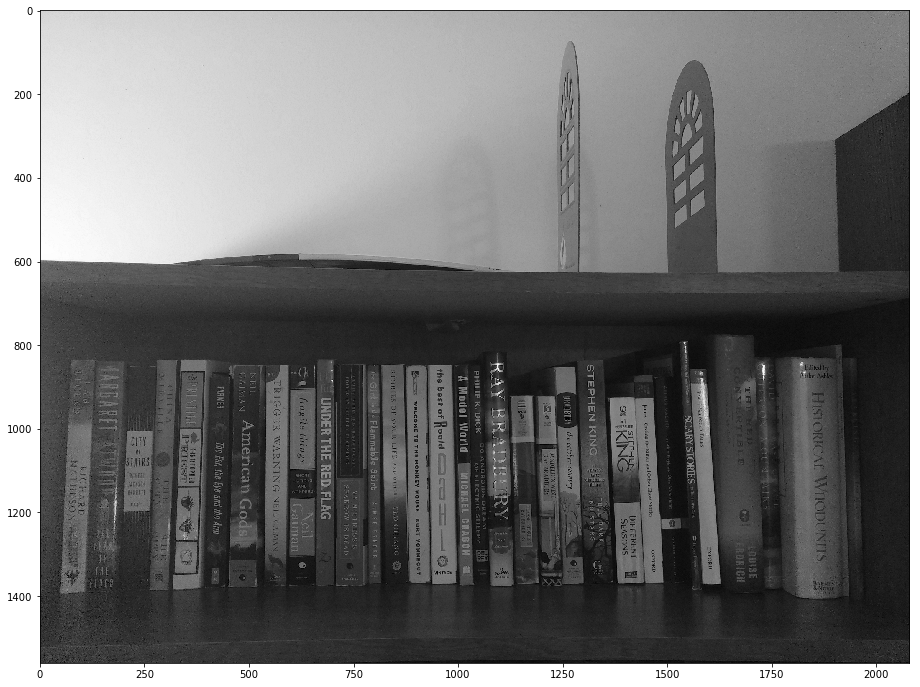

downsample 1


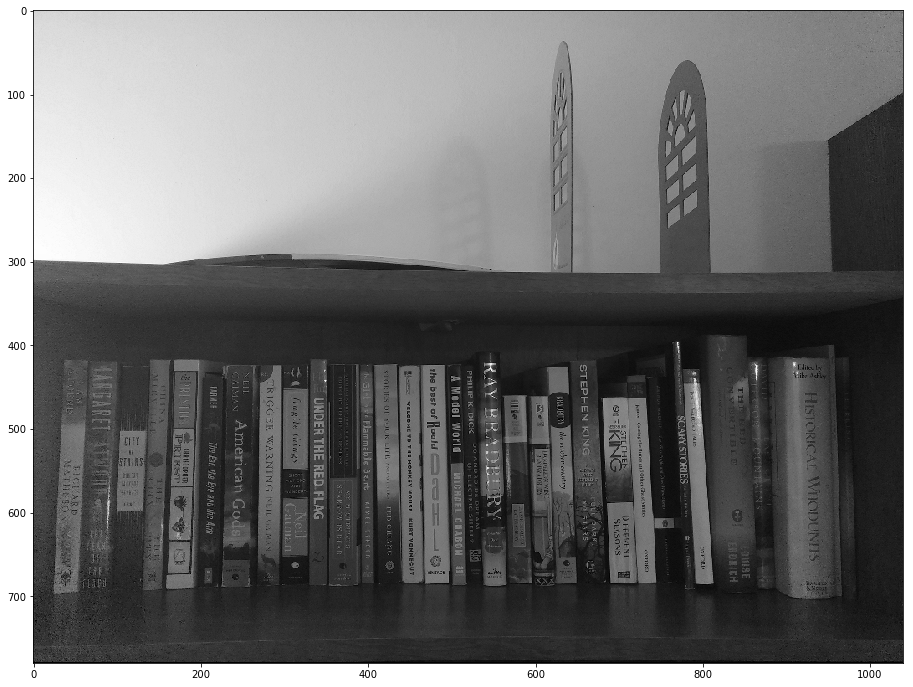

downsample 2


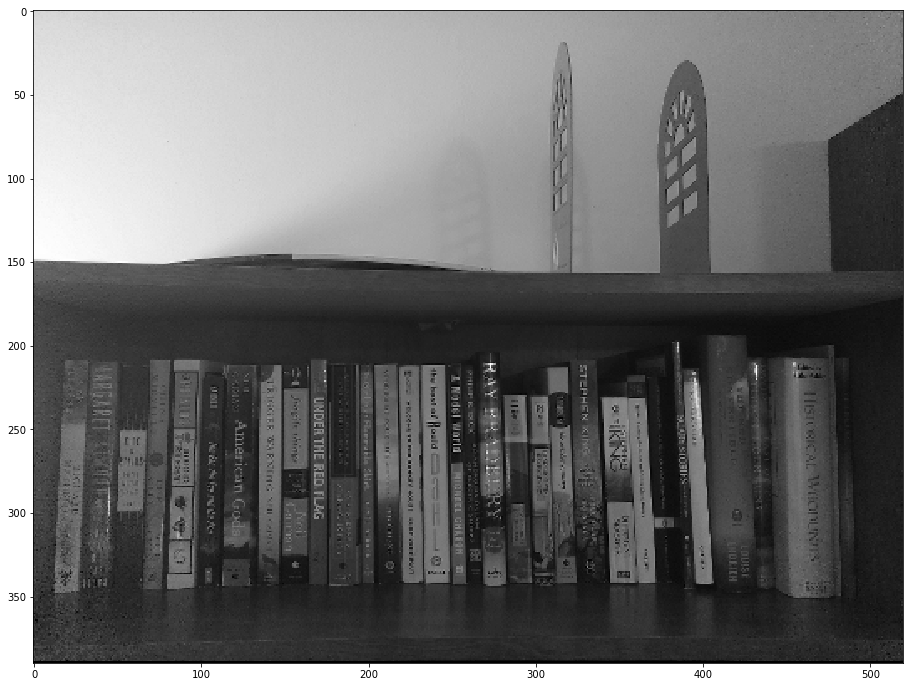

sobel x


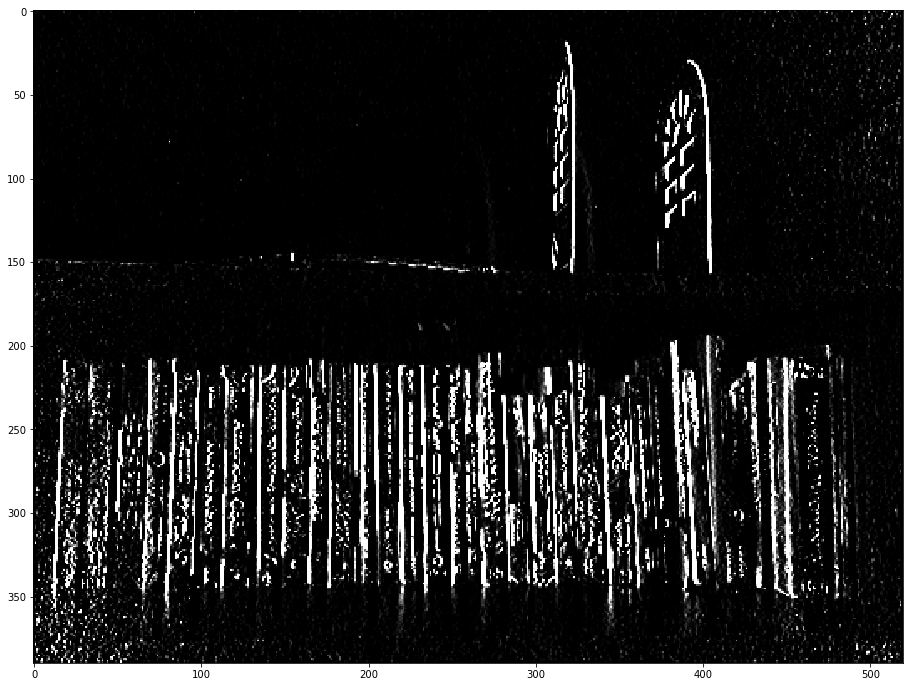

standardize


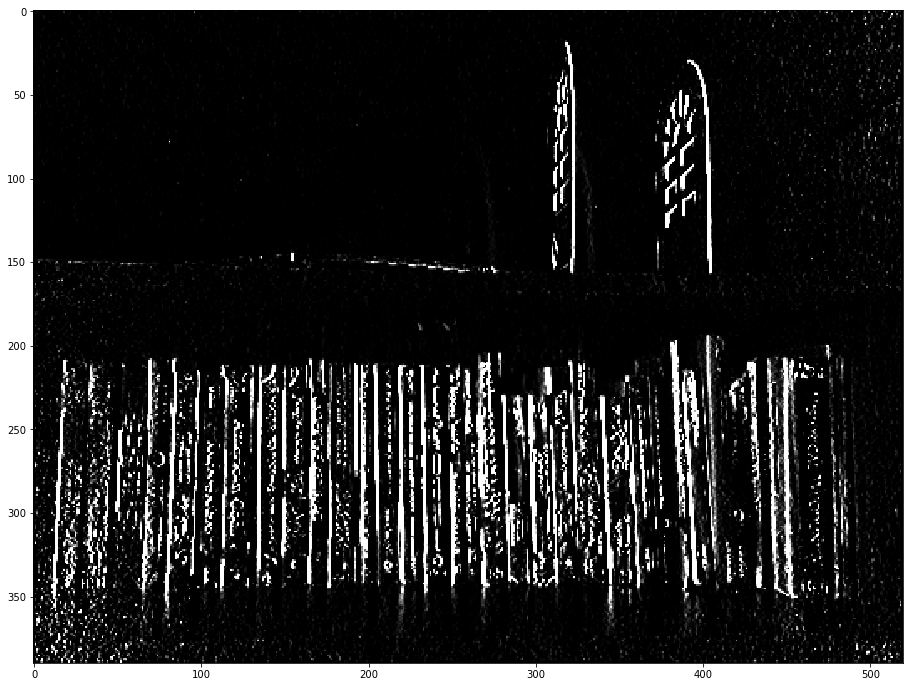

digitize


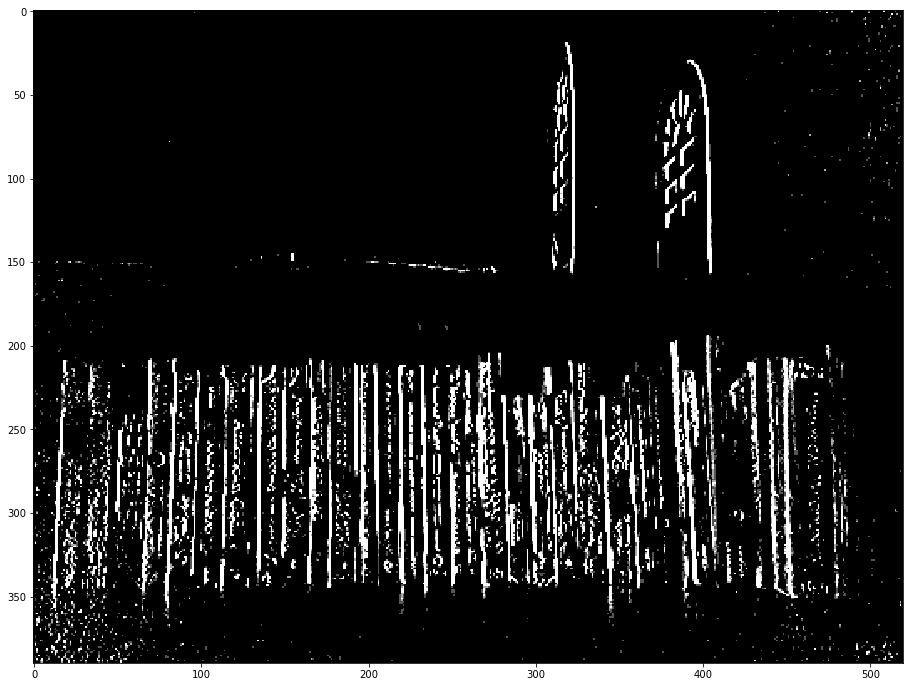

binarize


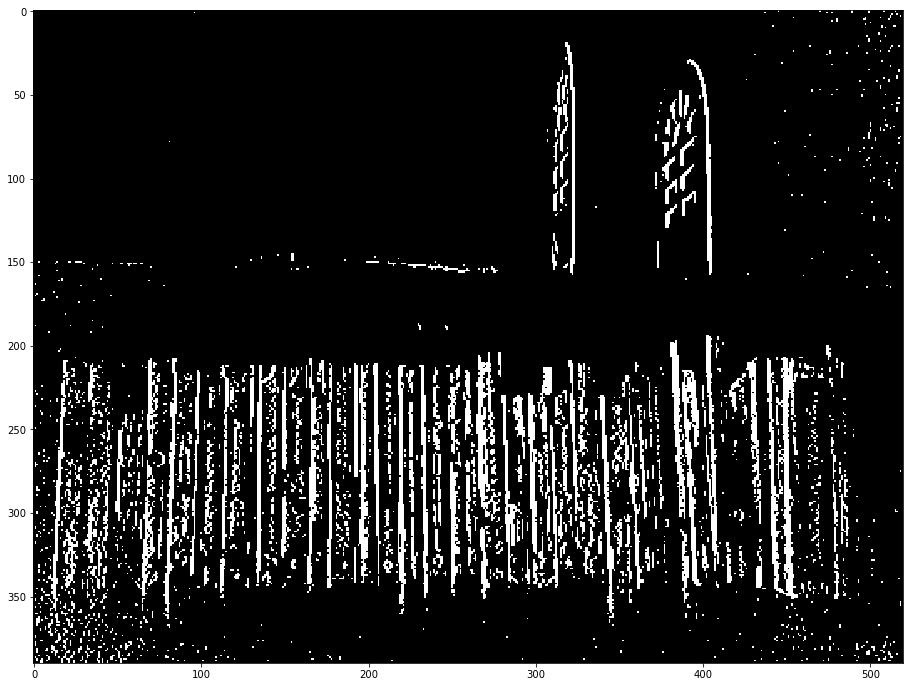

vertical erode


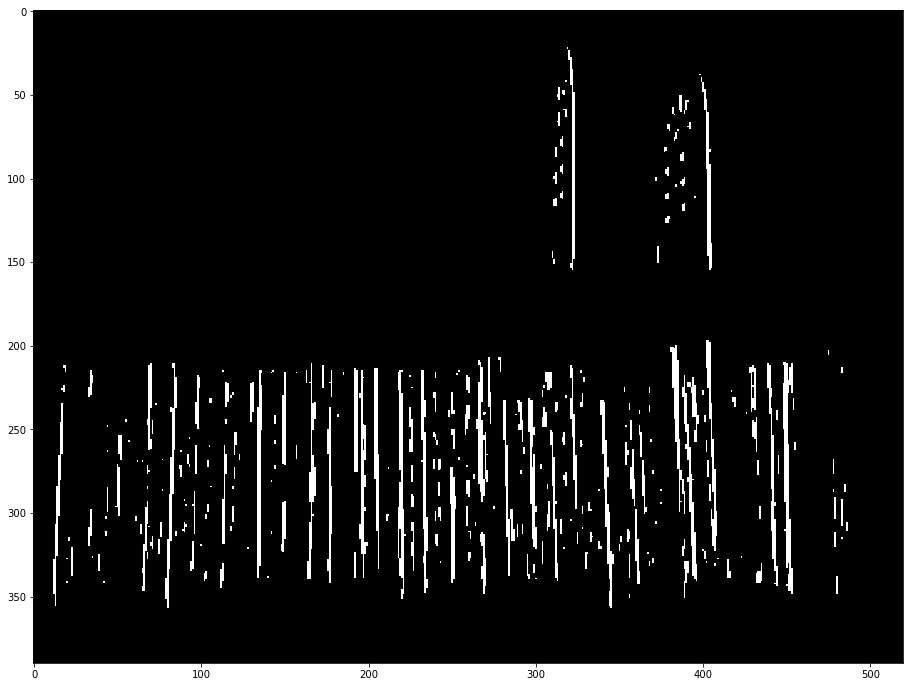

vertical dilate


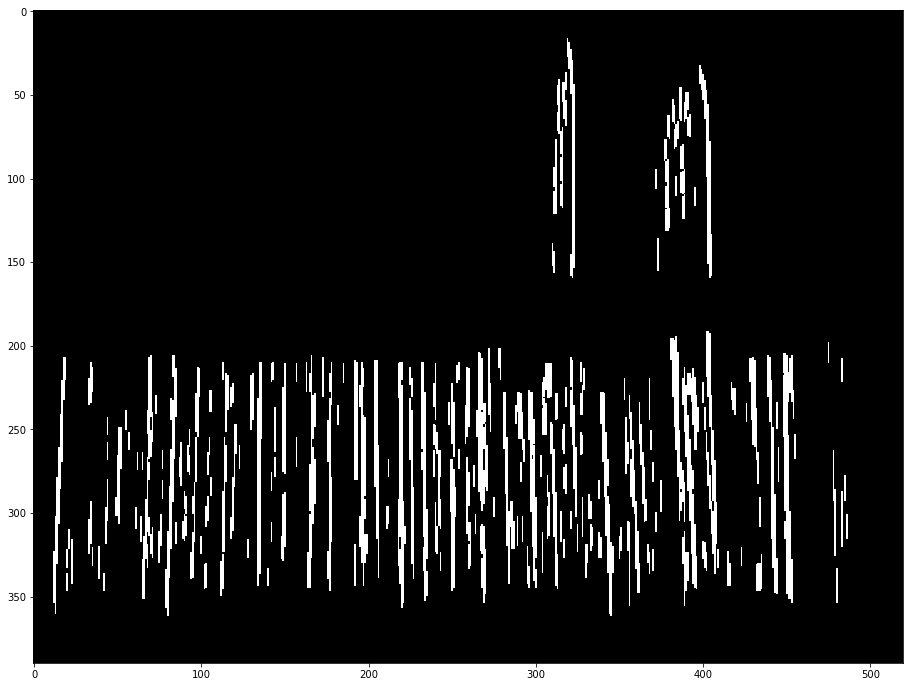

find connected components, levels =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]


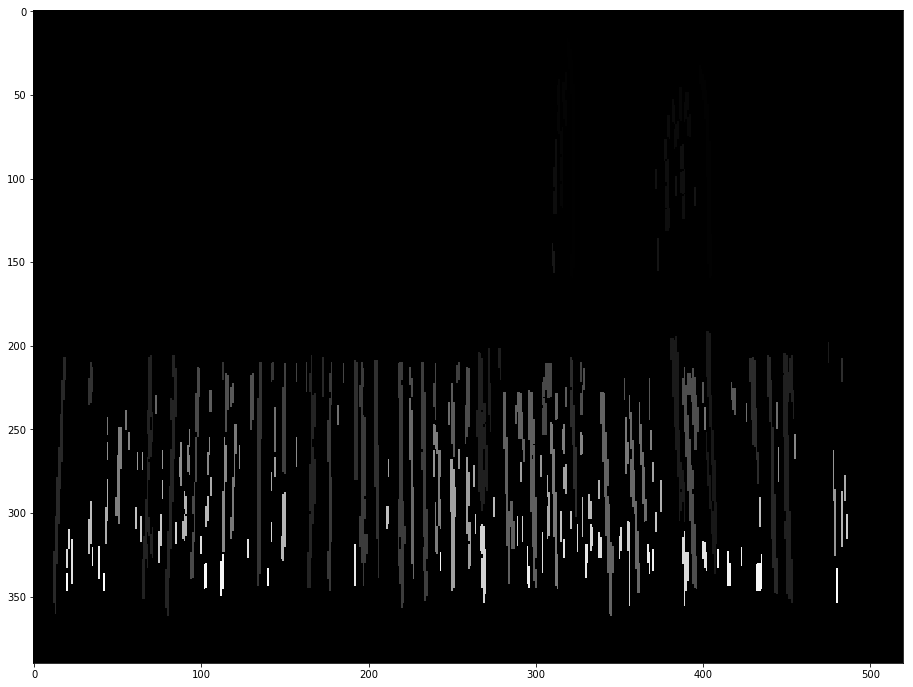

remove short clusters


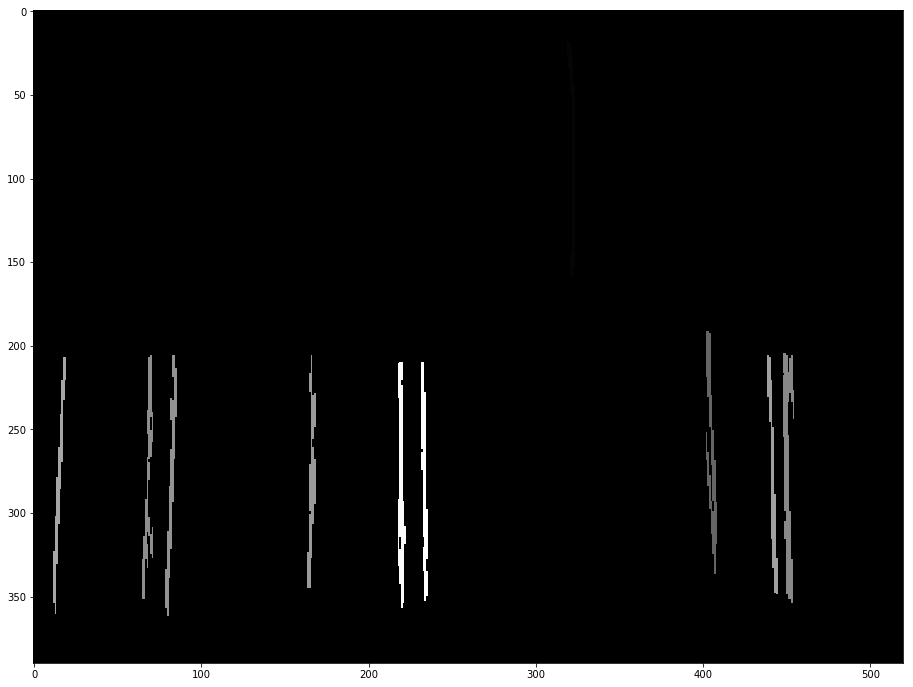

binarize


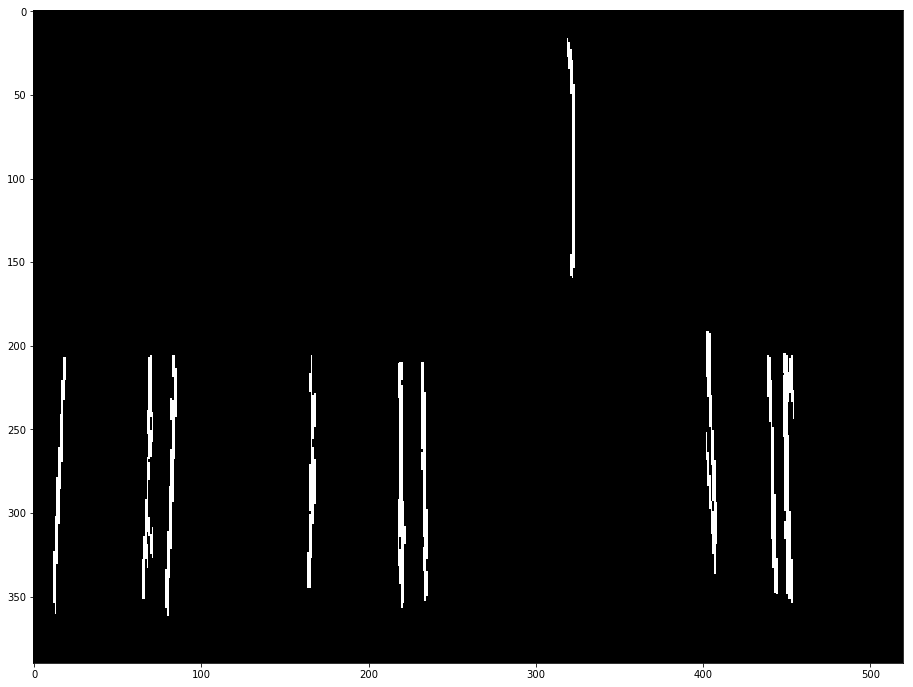

dilate


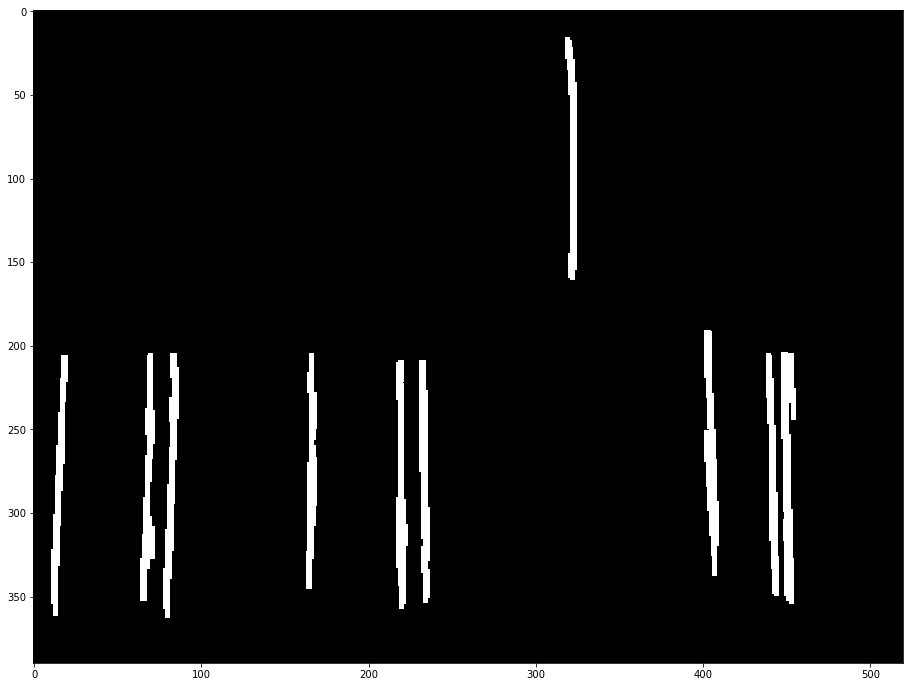

upsample


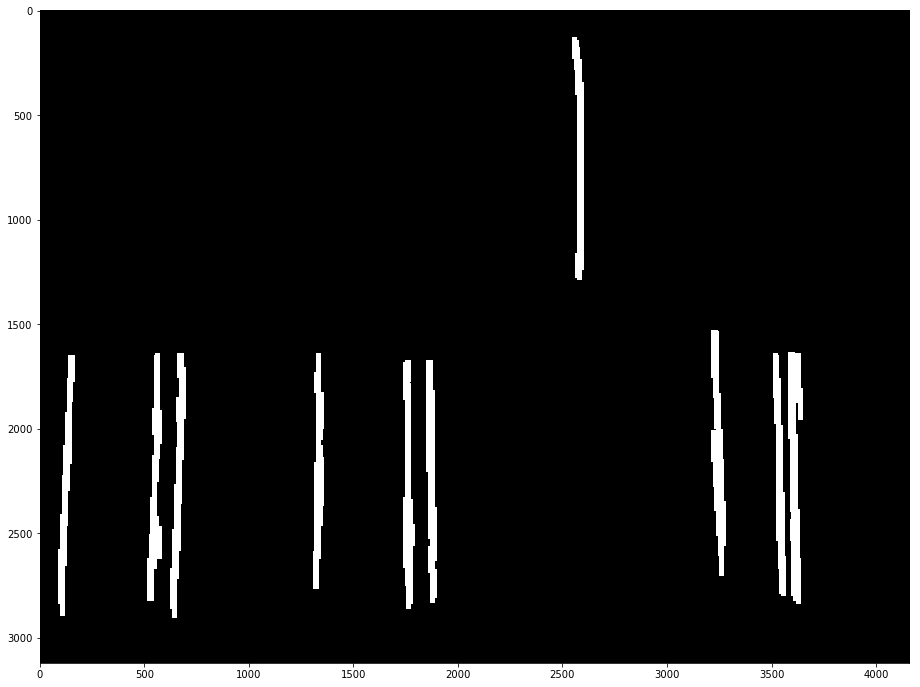

find connected components, levels =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


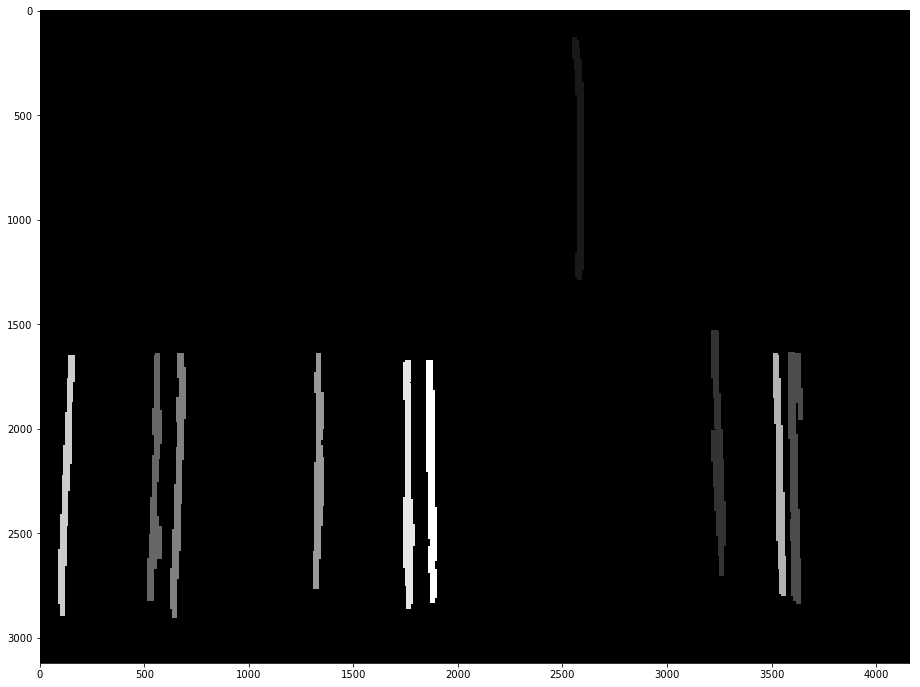

std ratio 28.4549004074
std ratio 18.4856670051
std ratio 21.8412129575
std ratio 20.5153638682
std ratio 22.0065207608
std ratio 23.9780549222
std ratio 24.011726699
std ratio 19.1234972097
std ratio 27.3873804224
std ratio 27.777357186


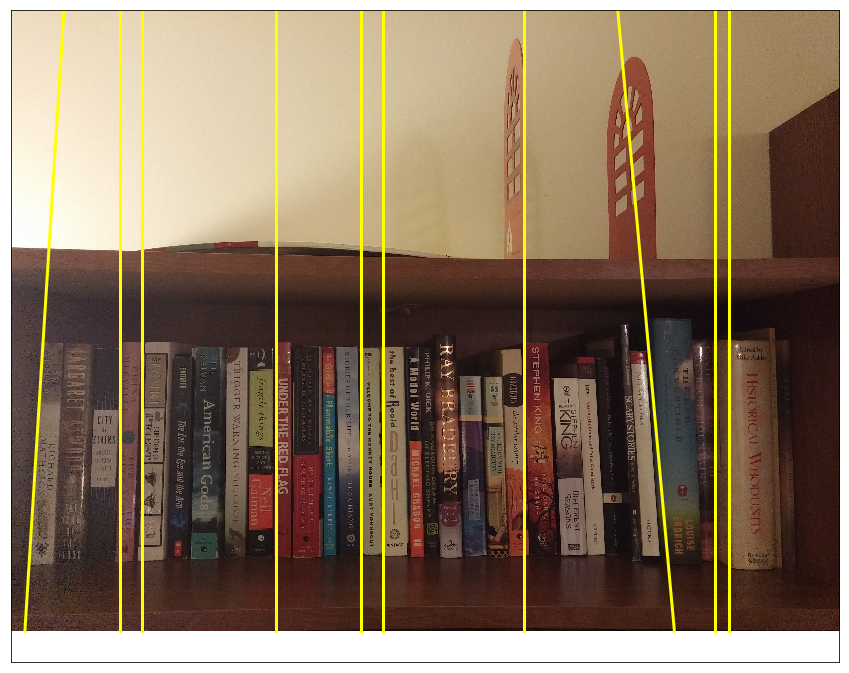

In [4]:
lines = shelfy.models.image_processing.get_book_lines(img, debug = True)

In [ ]:
def plot_img(img, show = True):

    fig = plt.figure(figsize = (16,12))
    plt.imshow(img, cmap = 'gray', interpolation = 'none')

    if show:
        plt.show()

In [ ]:
debug = True
# Copy
proc_img = np.mean(img[:,:], axis = 2).astype(np.uint8)


# Down sample
num_downsamples = 3
for i in range(num_downsamples):
    proc_img = scipy.ndimage.interpolation.zoom(proc_img,.5)

    if debug:
        print('downsample', i)
        plot_img(proc_img, show = True)



## Sobel x
proc_img = cv2.Sobel(proc_img, cv2.CV_8UC1, 1, 0, ksize = -1)**2.


if debug:
    print('sobel x')
    plot_img(proc_img)



# Standardize
proc_img = (proc_img - np.min(proc_img))/np.max(proc_img)

if debug:
    print('standardize')
    plot_img(proc_img)


# Digitize
img_max = np.max(proc_img)
img_min = np.min(proc_img)
num_levels = 4
bins = [1.*i*(img_max-img_min)/num_levels for i in range(0, num_levels)]
proc_img = np.digitize(proc_img, bins)

if debug:
    print('digitize')
    plot_img(proc_img, show = True)



# Binarize
proc_img[proc_img == np.min(proc_img)] = 0
proc_img[proc_img != 0] = 1


if debug:
    print('binarize')
    plot_img(proc_img, show = True)


# Horizontal erosion and subtraction
for i in range(1):
    structure_length = 5*(i+1)
    #structure = np.ones((3,3))*structure_length
    structure = np.ones((3,3))*structure_length
    old_proc_img = np.copy(proc_img)
    proc_img = proc_img - scipy.ndimage.morphology.binqqary_erosion(proc_img, structure, 1)

    if debug:
        print('erode/subtract')
        plot_img(proc_img, show = True)


# Vertical erode
for i in range(1):
    structure_length = 200
    #structure = np.array([[0,1,0],[0,1,0],[0,1,0]])*structure_length
    structure = np.array([[0,1,0],[0,1,0],[0,1,0]])*structure_length
    proc_img = scipy.ndimage.morphology.binary_erosion(proc_img, structure, 3)

    if debug:
        print('morpho erode')
        plot_img(proc_img, show = True)

# Vertical dilate
for i in range(1):
    structure_length = 3
    #structure = np.array([[0,1,0],[0,1,0],[0,1,0]])*structure_length
    structure = np.array([[0,1,0],[0,1,0],[0,1,0]])*structure_length
    proc_img = scipy.ndimage.morphology.binary_dilation(proc_img, structure, 3)

    if debug:
        print('morpho dilate')
        plot_img(proc_img, show = True)





# Connected components
proc_img, unique_values = scipy.ndimage.label(proc_img, structure = np.ones((3,3)))

unique_values = list(range(unique_values))





if debug:
    print('Digitize')
    plt.imshow(proc_img)
    plt.show()
    
    
# Remove clusters too small
drop_values = []
threshold = proc_img.shape[0]*.15
for unique_value in unique_values:
    bright_pixels = np.where(proc_img == unique_value)
    ptp = np.ptp(bright_pixels[0])



    if(ptp < threshold):
        drop_values.append(unique_value)

for drop_value in drop_values:
    proc_img[proc_img == drop_value] = 0

if debug:
    print('Remove clusters that are too small')
    plot_img(proc_img, show = True)


# Re-binarize
proc_img[proc_img != 0] = 1

if debug:
    print('Binarize')
    plot_img(proc_img, show = True)


# Horizontal dilate
for i in range(1):
    structure_length = 3
    structure = np.array([[1,1,1],[1,1,1],[1,1,1]])*structure_length
    proc_img = scipy.ndimage.morphology.binary_dilation(proc_img, structure, 1)

    if debug:
        print('morpho dilate')
        plot_img(proc_img, show = True)


# Up sample
proc_img = proc_img.repeat(8, axis = 0).repeat(8, axis = 1)


# Connected components
proc_img, unique_values = scipy.ndimage.label(proc_img, structure = np.ones((3,3)))
unique_values = list(range(unique_values))

# Lines
ms = []
bs = []
for unique_value in unique_values:
    line = np.where(proc_img == unique_value)
    xs = line[1]
    ys = line[0]


    m, b, r, p, std = scipy.stats.linregress(xs,ys)
    ms.append(m)
    bs.append(b)





new_img = np.copy(img[:,:,::-1])
new_img[proc_img != 0,:] = [0,255,128]



plot_img(new_img, show = False)

for i in range(len(ms)):
    y0 = 0
    y1 = new_img.shape[0]
    x0 = (y0-bs[i])/ms[i]
    x1 = (y1-bs[i])/ms[i]
    
    plt.plot([x0,x1],[y0,y1], c = 'yellow', lw = 3)
    
plt.xlim(0, new_img.shape[1])
plt.ylim(new_img.shape[0], 0)

plt.show()





In [ ]:
print(ms, bs)
plt.scatter(ms, bs, marker = '.')
plt.show()